In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.mlab as mlab
%matplotlib inline


import scipy.optimize as opt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving heart_dataset.csv to heart_dataset.csv


In [ ]:
df = pd.read_csv("/content/heartDisease.csv")
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.shape

(4238, 16)

In [ ]:
 df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [ ]:
df.drop(["education"], axis=1, inplace=True)

In [ ]:
df.shape

(4238, 15)

In [ ]:
df['male'].value_counts()

male
0    2419
1    1819
Name: count, dtype: int64

In [ ]:
sns.countplot(x='TenYearCHD',data=df,hue='male')

<Axes: xlabel='TenYearCHD', ylabel='count'>

In [ ]:
df[['prevalentStroke','TenYearCHD']].groupby('prevalentStroke', as_index=False).mean()

In [ ]:
sns.countplot(x='TenYearCHD',data=df,hue='prevalentStroke')

In [ ]:
sns.boxplot(df['age'],orient='vertical')

In [ ]:
df.head(5)

In [ ]:
df.isnull().sum()

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

In [ ]:
print(df.isnull().sum().sum())
df=df.dropna()
print(df.isnull().sum().sum())
df.shape

In [ ]:
df.isna().sum()

In [ ]:
df['cigsPerDay'].describe()

In [ ]:
#Outliers
cols =['age','BMI','heartRate','sysBP','totChol','diaBP']
plt.title("OUTLIERS VISUALIZATION")
for i in cols:
    df[i]
    sns.distplot(df[i],color='grey')
    plt.show()

In [ ]:
df['cigsPerDay'].unique()

In [ ]:
df.head(5)

In [ ]:
df['BPMeds'].value_counts()

In [ ]:
df['totChol'].describe()

In [ ]:
df['BMI'].describe()

In [ ]:
df['glucose'].describe()

In [ ]:
df.isnull().sum()

In [ ]:
df['male'].value_counts()

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten() # to flaten to 1d
for k,v in df.items():
    sns.boxplot(y=v, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

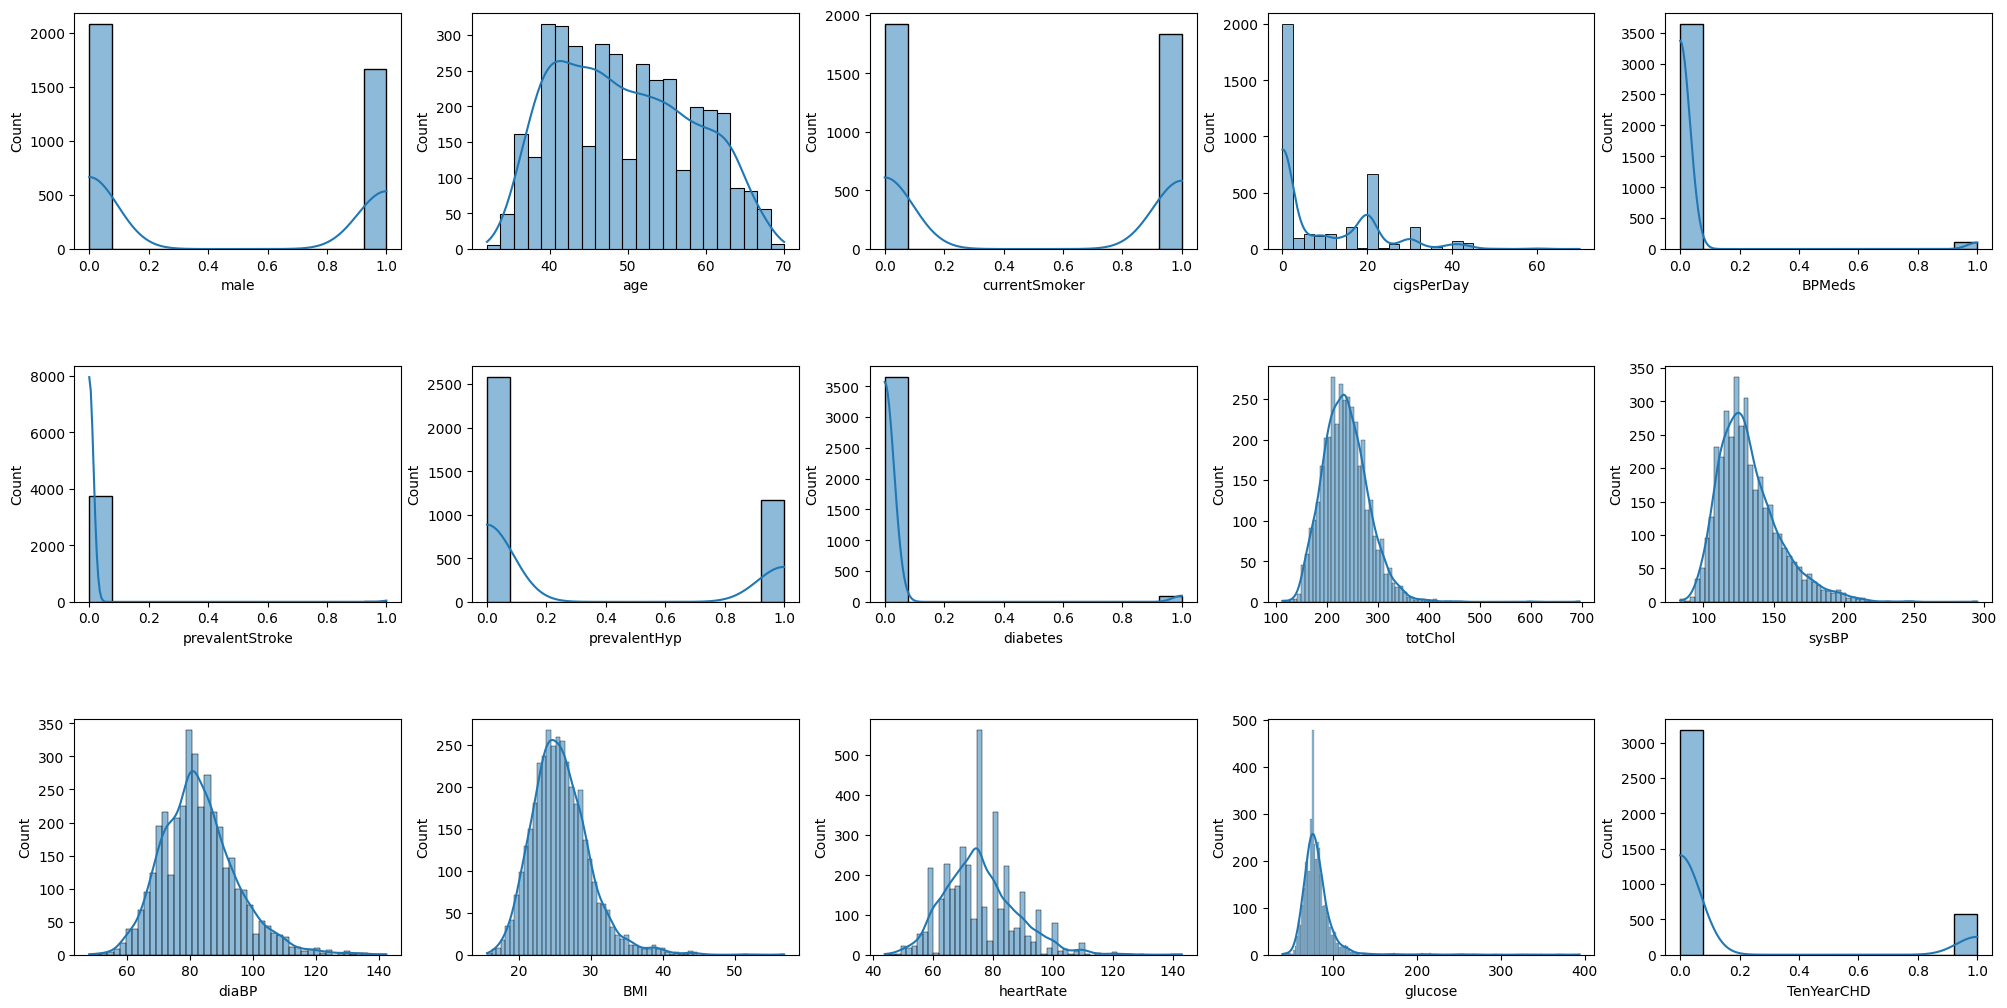

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten() # to flaten to 1d
for k,v in df.items():
    sns.histplot(v, kde=True, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

In [ ]:
df.corr()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024120,0.203861,0.326780,-0.052359,-0.002509,0.002987,0.011847,-0.067506,-0.044638,0.053602,0.074630,-0.115091,0.003236,0.096056
age,-0.024120,1.000000,-0.211427,-0.188611,0.131629,0.049990,0.305735,0.109257,0.260967,0.388558,0.205774,0.136093,-0.005857,0.118426,0.231414
currentSmoker,0.203861,-0.211427,1.000000,0.773166,-0.051828,-0.037582,-0.104753,-0.045319,-0.050025,-0.133098,-0.113915,-0.165165,0.054545,-0.054180,0.021722
cigsPerDay,0.326780,-0.188611,0.773166,1.000000,-0.046601,-0.035711,-0.066911,-0.039411,-0.030427,-0.092292,-0.056108,-0.090032,0.066726,-0.055165,0.056064
BPMeds,-0.052359,0.131629,-0.051828,-0.046601,1.000000,0.111595,0.263089,0.056322,0.089554,0.269507,0.199400,0.105090,0.010232,0.052442,0.084704
prevalentStroke,-0.002509,0.049990,-0.037582,-0.035711,0.111595,1.000000,0.065208,0.009417,0.012259,0.060431,0.055232,0.035550,-0.016675,0.015779,0.047669
prevalentHyp,0.002987,0.305735,-0.104753,-0.066911,0.263089,0.065208,1.000000,0.082096,0.165049,0.697960,0.616655,0.303382,0.142512,0.085959,0.178779
diabetes,0.011847,0.109257,-0.045319,-0.039411,0.056322,0.009417,0.082096,1.000000,0.047374,0.104415,0.051841,0.093061,0.063383,0.616084,0.093190
totChol,-0.067506,0.260967,-0.050025,-0.030427,0.089554,0.012259,0.165049,0.047374,1.000000,0.216572,0.170353,0.119398,0.094802,0.046769,0.089408
sysBP,-0.044638,0.388558,-0.133098,-0.092292,0.269507,0.060431,0.697960,0.104415,0.216572,1.000000,0.785909,0.330569,0.181482,0.132928,0.220170


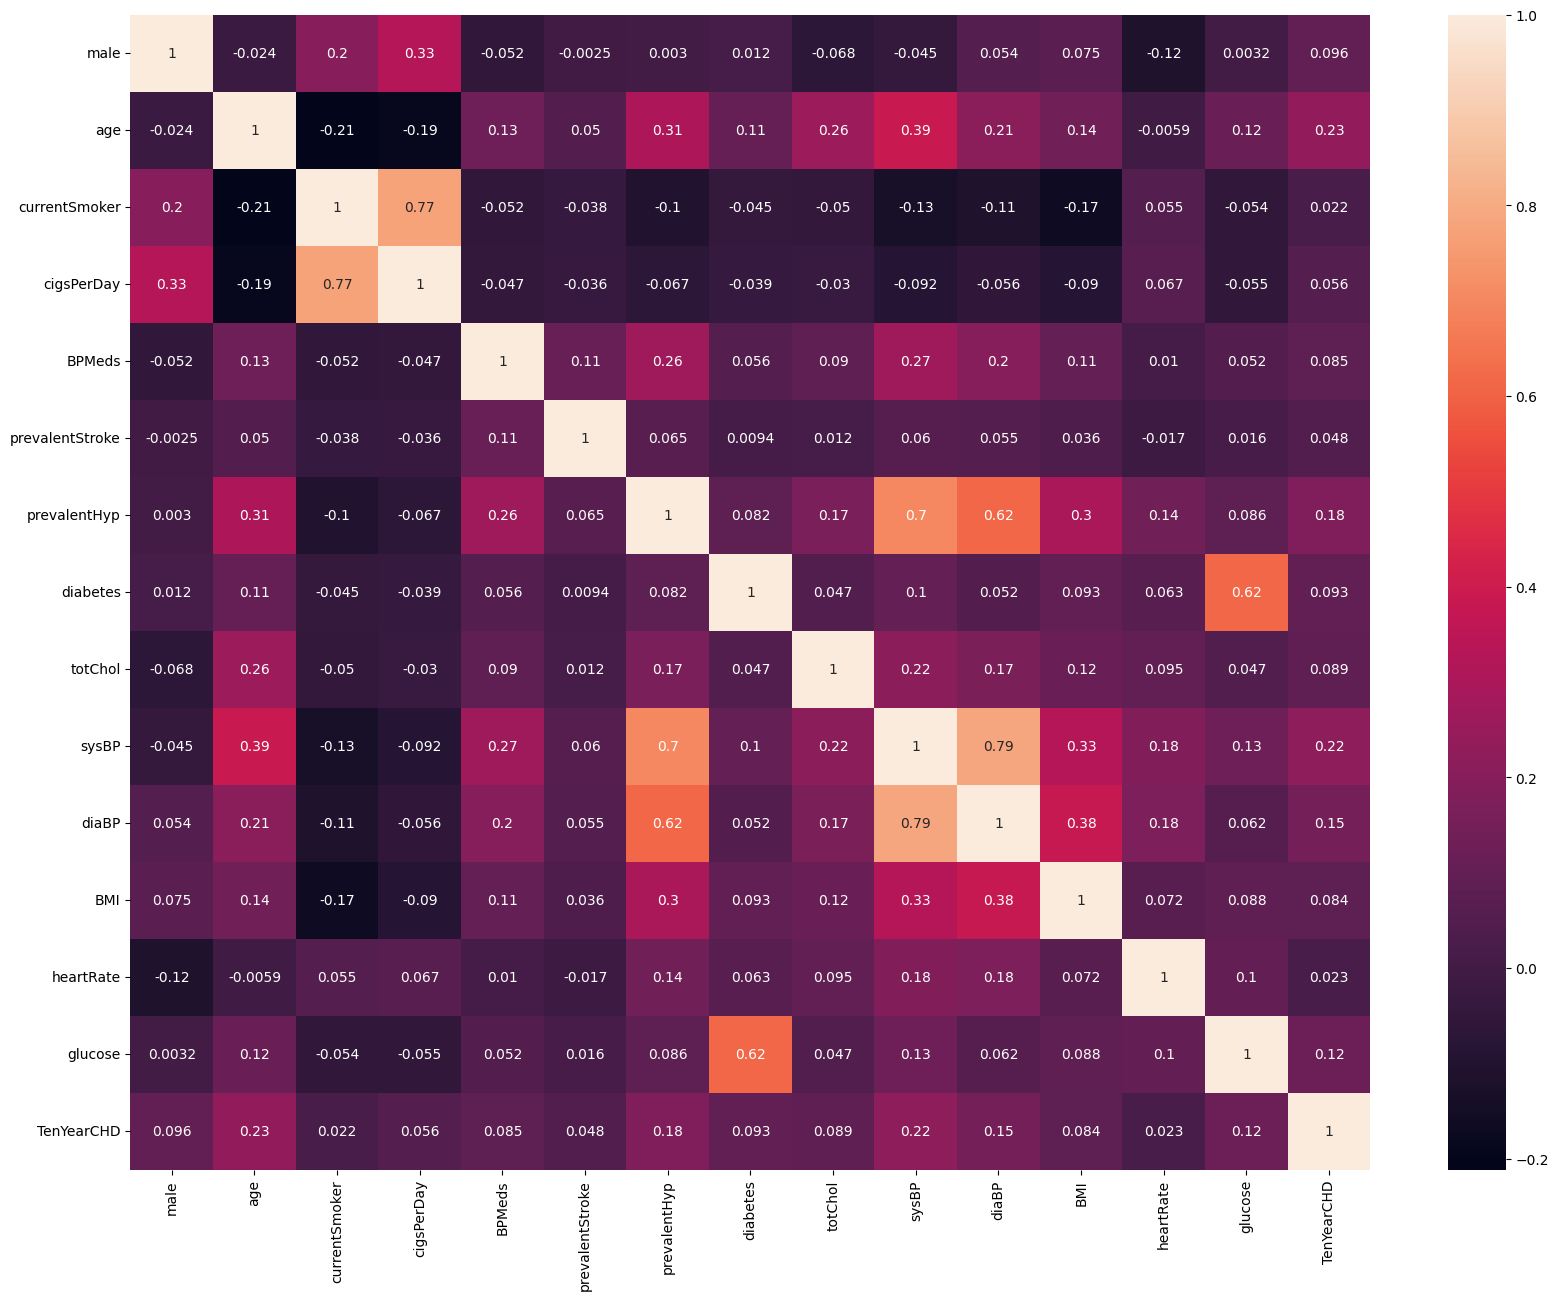

In [ ]:
fig,corr=plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# column_sels=['male','age','currentSmoker','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay','TenYearCHD']
column_sels=['male','age','cigsPerDay','BPMeds','prevalentStrok','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']

In [ ]:
# df=df.loc[:,column_sels]
df.drop(['currentSmoker'], axis=1, inplace=True)

In [ ]:
df1 = df[df['TenYearCHD'] == 1]
df0 = df[df['TenYearCHD'] == 0]

In [ ]:
df1 = df1.drop('TenYearCHD', axis = 1)


In [ ]:
df1

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0
15,0,38,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0
17,0,46,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0
25,1,47,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,1,50,0.0,0.0,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0
4223,1,56,0.0,1.0,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0
4226,1,58,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0
4232,1,68,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0


In [ ]:
df0 = df0.drop('TenYearCHD', axis = 1)

In [ ]:
df1.describe()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,0.557692,54.251748,10.580420,0.064685,0.013986,0.506993,0.062937,246.351399,143.806818,87.129371,26.617115,76.342657,88.867133
std,0.497095,7.995374,12.958326,0.246185,0.117535,0.500389,0.243062,48.198153,26.806431,14.280461,4.546973,12.132286,40.840253
min,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,48.000000,15.960000,50.000000,40.000000
25%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214.000000,125.000000,78.000000,23.645000,68.000000,72.000000
50%,1.000000,55.000000,2.000000,0.000000,0.000000,1.000000,0.000000,242.500000,139.000000,85.250000,26.190000,75.000000,79.000000
75%,1.000000,61.000000,20.000000,0.000000,0.000000,1.000000,0.000000,272.000000,158.000000,95.000000,29.062500,84.000000,90.000000
max,1.000000,69.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,140.000000,56.800000,120.000000,394.000000


In [ ]:
df.describe()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df0.describe()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000,3177.000000
mean,0.424929,48.737488,8.721750,0.024237,0.004092,0.276676,0.020774,235.260623,130.306106,82.178313,25.664271,75.588920,80.625748
std,0.494410,8.397910,11.705911,0.153807,0.063847,0.447425,0.142650,43.727323,20.417143,11.298053,3.956412,11.924367,19.057153
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,52.000000,15.540000,44.000000,40.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,23.030000,68.000000,71.000000
50%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,81.000000,25.230000,75.000000,78.000000
75%,1.000000,55.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,141.000000,88.000000,27.870000,82.000000,86.000000
max,1.000000,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,243.000000,142.500000,51.280000,143.000000,386.000000


In [ ]:
variable_ranges = {}
for feature in df1.columns:
    variable_ranges[feature] =  (df0[feature].mean(),df1[feature].mean())
print(variable_ranges)

{'male': (0.42492917847025496, 0.5576923076923077), 'age': (48.73748819641171, 54.25174825174825), 'cigsPerDay': (8.721750078690588, 10.58041958041958), 'BPMeds': (0.02423670129052565, 0.06468531468531469), 'prevalentStroke': (0.004091910607491344, 0.013986013986013986), 'prevalentHyp': (0.2766761095372993, 0.506993006993007), 'diabetes': (0.02077431539187913, 0.06293706293706294), 'totChol': (235.26062322946174, 246.3513986013986), 'sysBP': (130.3061063896758, 143.8068181818182), 'diaBP': (82.1783128737803, 87.12937062937063), 'BMI': (25.664271325149517, 26.617115384615385), 'heartRate': (75.58892036512434, 76.34265734265735), 'glucose': (80.62574756059175, 88.86713286713287)}


In [ ]:
# column_sels=['male','age','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']

column_sels=['male','age','cigsPerDay','BPMeds','prevalentStrok','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']

In [ ]:
# column_sels=['age','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']
# x=df.loc[:,column_sels]
# y=df['TenYearCHD']
# x=pd.DataFrame(x,columns=column_sels)


In [ ]:
x=df.drop('TenYearCHD', axis = 1)
y=df['TenYearCHD']


In [ ]:
x

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3749, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

# # Predict using the trained model
# y_pred = model.predict(x_test)
# print(y_pred)

# # Model evaluation
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Display evaluation metrics
# print("Mean Squared Error:", mse)
# print("R-squared:", r2)





LinearRegression()

In [ ]:
weights = model.coef_
coefficients = {}

# Display the weights for each attribute
for feature, weight in zip(x.columns, weights):
    coefficients[feature] = weight
    print(f'{feature}: {weight}')

male: 0.05685942131345492
age: 0.006785211597109467
cigsPerDay: 0.002732224657491845
BPMeds: 0.0787108094901236
prevalentStroke: 0.15253966345563777
prevalentHyp: 0.039773946490904544
diabetes: -0.007033892472736971
totChol: 0.0001613149255868143
sysBP: 0.002135297954435557
diaBP: -0.0009312178473725564
BMI: -0.00047303044341126267
heartRate: -0.00010385860182444864
glucose: 0.001095608610640863


In [ ]:
coefficient = list(coefficients.values())
coefficient

[0.05685942131345492,
 0.006785211597109467,
 0.002732224657491845,
 0.0787108094901236,
 0.15253966345563777,
 0.039773946490904544,
 -0.007033892472736971,
 0.0001613149255868143,
 0.002135297954435557,
 -0.0009312178473725564,
 -0.00047303044341126267,
 -0.00010385860182444864,
 0.001095608610640863]

In [ ]:
df1_mean = df1.mean()
OutcomeFor1 = 0
# Print the element-wise product of means and coefficients
for mean, coef in zip(df1_mean, coefficient):
    OutcomeFor1 = OutcomeFor1 +(mean * coef)
print(OutcomeFor1)

0.7981931977964959


In [ ]:
df0_mean = df0.mean()
OutcomeFor0 = 0
# Print the element-wise product of means and coefficients
for mean, coef in zip(df0_mean, coefficient):
   OutcomeFor0 =OutcomeFor0 +(mean * coef)
print(OutcomeFor0)

0.7000866462315828


In [ ]:
newdf = df.drop('TenYearCHD', axis = 1)


In [ ]:
row_sums = newdf.apply(lambda row: sum(row*coefficient[0]),axis=1).tolist()

In [ ]:
len(row_sums)

3749

In [ ]:
df['coff_mean'] = row_sums


In [ ]:
 df.loc[(df['coff_mean'] > OutcomeFor0) & (df['coff_mean'] < OutcomeFor1), 'TenYearCHD'] = 2

In [ ]:
df

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,coff_mean
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,33.829650
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,39.672524
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,39.337622
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,43.132420
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,43.275706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0,37.240647
4232,1,68,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1,38.274351
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,46.338723
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,37.596018


In [ ]:
# print(df[df["tenYearCHD"]])

In [ ]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3177
1     572
Name: count, dtype: int64

In [ ]:
df = df.drop('coff_mean', axis = 1)

In [ ]:
X=df.drop('TenYearCHD', axis = 1)


In [ ]:
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0
4232,1,68,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0


In [ ]:
y = df['TenYearCHD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=29)

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.mlab as mlab
%matplotlib inline


import scipy.optimize as opt
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize logistic regression model
log_model = LogisticRegression()
# Fit the model
log_model.fit(X_train, y_train)







LogisticRegression()

In [ ]:
# Make predictions
y_test_prediction=log_model.predict(X_test)
y_train_prediction=log_model.predict(X_train)

In [ ]:
# Evaluate the model

# Evaluate the model
acc1 = accuracy_score(y_test, y_test_prediction)
f11 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision1 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall1 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for Logistic Regression is: {round(acc1, 3) * 100}%")
print(f"The F1 score for Logistic Regression is: {round(f11, 3) * 100}%")
print(f"The precision score for Logistic Regression is: {round(precision1, 3) * 100}%")
print(f"The recall score for Logistic Regression is: {round(recall1, 3) * 100}%")


The accuracy score for Logistic Regression is: 84.89999999999999%
The F1 score for Logistic Regression is: 79.10000000000001%
The precision score for Logistic Regression is: 79.10000000000001%
The recall score for Logistic Regression is: 84.89999999999999%


In [ ]:
from sklearn__matrix import accuracy_score, f1_score, precision_score, recall_score

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=2)  # Choose an appropriate value for n_neighbors

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
knn_pred = knn.predict(X_test)
train_pred = knn.predict(X_train)

print(accuracy_score(y_train, train_pred))

# Evaluate the model
acc2 = accuracy_score(y_test, y_test_prediction)
f12 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision2 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall2 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for knn is: {round(acc2, 3) * 100}%")
print(f"The F1 score for knn is: {round(f12, 3) * 100}%")
print(f"The precision score for knn is: {round(precision2, 3) * 100}%")
print(f"The recall score for knn is: {round(recall2, 3) * 100}%")



0.9314786585365854
The accuracy score for knn is: 89.9%
The F1 score for knn is: 87.1%
The precision score for knn is: 86.1%
The recall score for knn is: 87.9%


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize SVM model
svm = SVC()

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
svm_pred = svm.predict(X_test)
train_pred = svm.predict(X_train)

# Evaluate the model

acc3 = accuracy_score(y_test, y_test_prediction)
f13 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision3 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall3 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for svm is: {round(acc3, 3) * 100}%")
print(f"The F1 score for svm is: {round(f13, 3) * 100}%")
print(f"The precision score for svm is: {round(precision3, 3) * 100}%")
print(f"The recall score for svm is: {round(recall3, 3) * 100}%")


The accuracy score for svm is: 84.89999999999999%
The F1 score for svm is: 79.10000000000001%
The precision score for svm is: 79.10000000000001%
The recall score for svm is: 84.89999999999999%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_test_prediction = decision_tree_classifier.predict(X_test)
y_train_prediction= decision_tree_classifier.predict(X_train)

In [ ]:

print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

0.7573333333333333
1.0


In [ ]:

acc4 = accuracy_score(y_test, y_test_prediction)
f14 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision4 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall4 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for decision_tree_classifier is: {round(acc4, 3) * 100}%")
print(f"The F1 score for decision_tree_classifier is: {round(f14, 3) * 100}%")
print(f"The precision score for decision_tree_classifier is: {round(precision4, 3) * 100}%")
print(f"The recall score for decision_tree_classifier is: {round(recall4, 3) * 100}%")


The accuracy score for decision_tree_classifier is: 75.7%
The F1 score for decision_tree_classifier is: 76.2%
The precision score for decision_tree_classifier is: 76.7%
The recall score for decision_tree_classifier is: 75.7%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn__matrices import accuracy_score, f1_score, precision_score, recall_score
# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=50, random_state=70)

# Train the model
random_forest_classifier.fit(X_train, y_train)
y_test_prediction = random_forest_classifier.predict(X_test)
y_train_prediction= random_forest_classifier.predict(X_train)



In [ ]:

print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

0.8771111111111112
1.0


In [ ]:
# Evaluate the model

acc5 = accuracy_score(y_test, y_test_prediction)
f15 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision5 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall5 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for random_forest_classifier is: {round(acc5, 3) * 100}%")
print(f"The F1 score for random_forest_classifier is: {round(f15, 3) * 100}%")
print(f"The precision score for random_forest_classifier is: {round(precision5, 3) * 100}%")
print(f"The recall score for random_forest_classifier is: {round(recall5, 3) * 100}%")


The accuracy score for random_forest_classifier is: 87.7%
The F1 score for random_forest_classifier is: 84.8%
The precision score for random_forest_classifier is: 84.39999999999999%
The recall score for random_forest_classifier is: 87.7%


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_prediction = clf.predict(X_test)
y_train_prediction= clf.predict(X_train)


In [ ]:
print("Accuracy:", clf.score(X_test, y_test)*100)
print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

Accuracy: 82.31111111111112
0.8231111111111111
0.823170731707317


In [ ]:
# Evaluate the model

acc6 = accuracy_score(y_test, y_test_prediction)
f16 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision6 = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall6 = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for random_forest_classifier is: {round(acc6, 3) * 100}%")
print(f"The F1 score for random_forest_classifier is: {round(f16, 3) * 100}%")
print(f"The precision score for random_forest_classifier is: {round(precision6, 3) * 100}%")
print(f"The recall score for random_forest_classifier is: {round(recall6, 3) * 100}%")


The accuracy score for random_forest_classifier is: 82.3%
The F1 score for random_forest_classifier is: 79.9%
The precision score for random_forest_classifier is: 78.4%
The recall score for random_forest_classifier is: 82.3%


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Initialize AdaBoost classifier with DecisionTreeClassifier as the base estimator
# You can replace DecisionTreeClassifier with any other classifier
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 50  # Number of weak learners (base estimators)
learning_rate = 1.0  # Learning rate
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)
y_test_prediction = adaboost.predict(X_test)
y_train_prediction= adaboost.predict(X_train)



In [ ]:
print("Accuracy:",adaboost.score(X_test, y_test)*100)
print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

Accuracy: 84.44444444444444
0.8444444444444444
0.8620426829268293


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_test_prediction)
f1 = f1_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
precision = precision_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass
recall = recall_score(y_test, y_test_prediction, average='weighted')  # Specify 'weighted' for multiclass

# Print the evaluation metrics
print(f"The accuracy score for GaussianNB_classifier is: {round(acc, 3) * 100}%")
print(f"The F1 score for GaussianNB_classifier is: {round(f1, 3) * 100}%")
print(f"The precision score for GaussianNB_classifier is: {round(precision, 3) * 100}%")
print(f"The recall score for GaussianNB_classifier is: {round(recall, 3) * 100}%")

The accuracy score for GaussianNB_classifier is: 84.39999999999999%
The F1 score for GaussianNB_classifier is: 79.9%
The precision score for GaussianNB_classifier is: 79.0%
The recall score for GaussianNB_classifier is: 84.39999999999999%


In [ ]:
import xgboost as xgb


# Initialize XGBoost classifier
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}
Xgboost = xgb.XGBClassifier(**params)

# Train the XGBoost classifier
Xgboost.fit(X_train, y_train)

y_test_prediction = Xgboost.predict(X_test)
y_train_prediction= Xgboost.predict(X_train)


In [ ]:
print("Accuracy:",Xgboost.score(X_test, y_test)*100)
print(accuracy_score(y_test,y_test_prediction))
print(accuracy_score(y_train,y_train_prediction))

Accuracy: 84.35555555555555
0.8435555555555555
0.8765243902439024


In [ ]:
# import numpy as np
# input_data = [61,22,1500,905,28,65,10,300]
# input_data_as_numpy_array = np.asarray(input_data)
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = knn.predict(input_data_reshaped)

# if prediction[0] == 0:
#     print("The Person does not have a Heart disease")
# elif prediction[0]==1:
#     print("The person has Heart disease")

# elif prediction[0]==2:
#     print("The person may have heart diseases in future")


In [ ]:
data = {'Model':['Logistic Regression','KNN','SVM','Decision Tree','Random Forest','GaussianNB'],
        'F1_Score':  [f11,f12,f13,f14,f15,f16],'Accuracies':[acc1,acc2,acc3,acc4,acc5,acc6],'Recall':[recall1,recall2,recall3,recall4,recall5,recall6],
        'Precision':[precision1,precision2,precision3,precision4,precision5,precision6]}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
print(df)

                 Model  F1_Score  Accuracies    Recall  Precision
0  Logistic Regression  0.790584    0.848889  0.848889   0.790627
1                  KNN  0.870584    0.898889  0.878889   0.860627
2                  SVM  0.790584    0.848889  0.848889   0.790627
3        Decision Tree  0.762089    0.757333  0.757333   0.767119
4        Random Forest  0.847718    0.877111  0.877111   0.843697
5           GaussianNB  0.798608    0.823111  0.823111   0.783995


In [ ]:
Accuracies = [acc1,acc2,acc3,acc4,acc5,acc6]
F1_scores = [f11,f12,f13,f14,f15,f16]
Precisions = [precision1,precision2,precision3,precision4,precision5,precision6]
Recalls = [recall1,recall2,recall3,recall4,recall5,recall6]

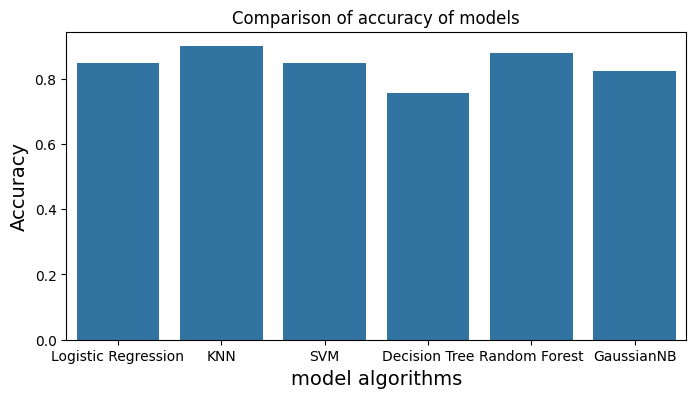

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='Accuracies', data = df)
plt.title('Comparison of accuracy of models')
plt.xlabel('model algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

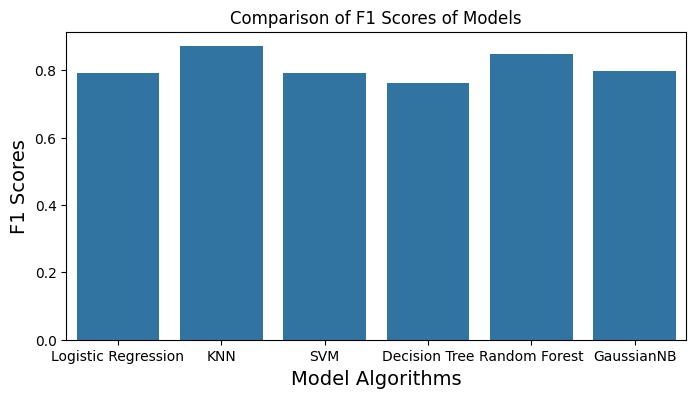

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='F1_Score', data=df)
plt.title('Comparison of F1 Scores of Models')
plt.xlabel('Model Algorithms', fontsize=14)
plt.ylabel('F1 Scores', fontsize=14)
plt.show()

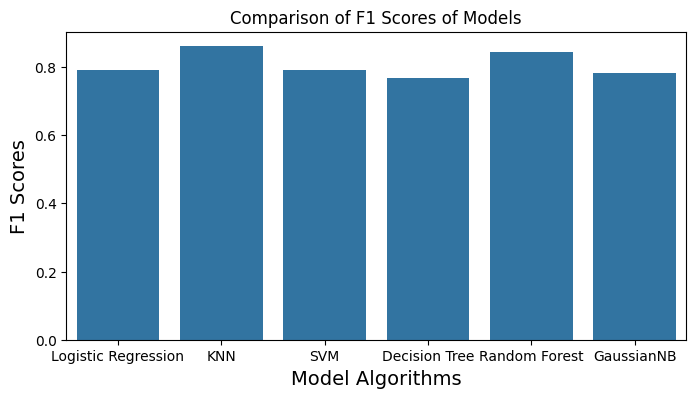

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='Precision', data=df)
plt.title('Comparison of F1 Scores of Models')
plt.xlabel('Model Algorithms', fontsize=14)
plt.ylabel('F1 Scores', fontsize=14)
plt.show()

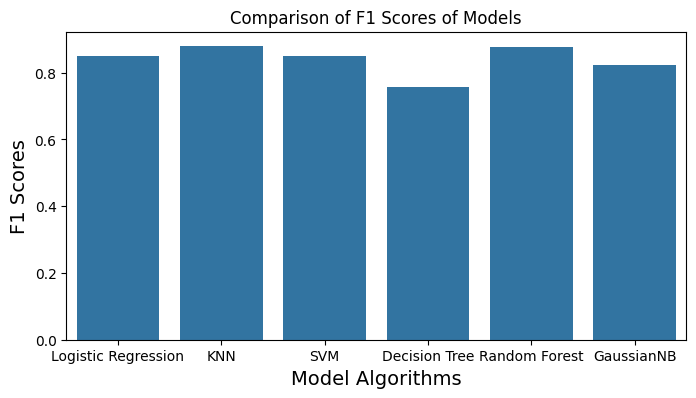

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='Recall', data=df)
plt.title('Comparison of F1 Scores of Models')
plt.xlabel('Model Algorithms', fontsize=14)
plt.ylabel('F1 Scores', fontsize=14)
plt.show()

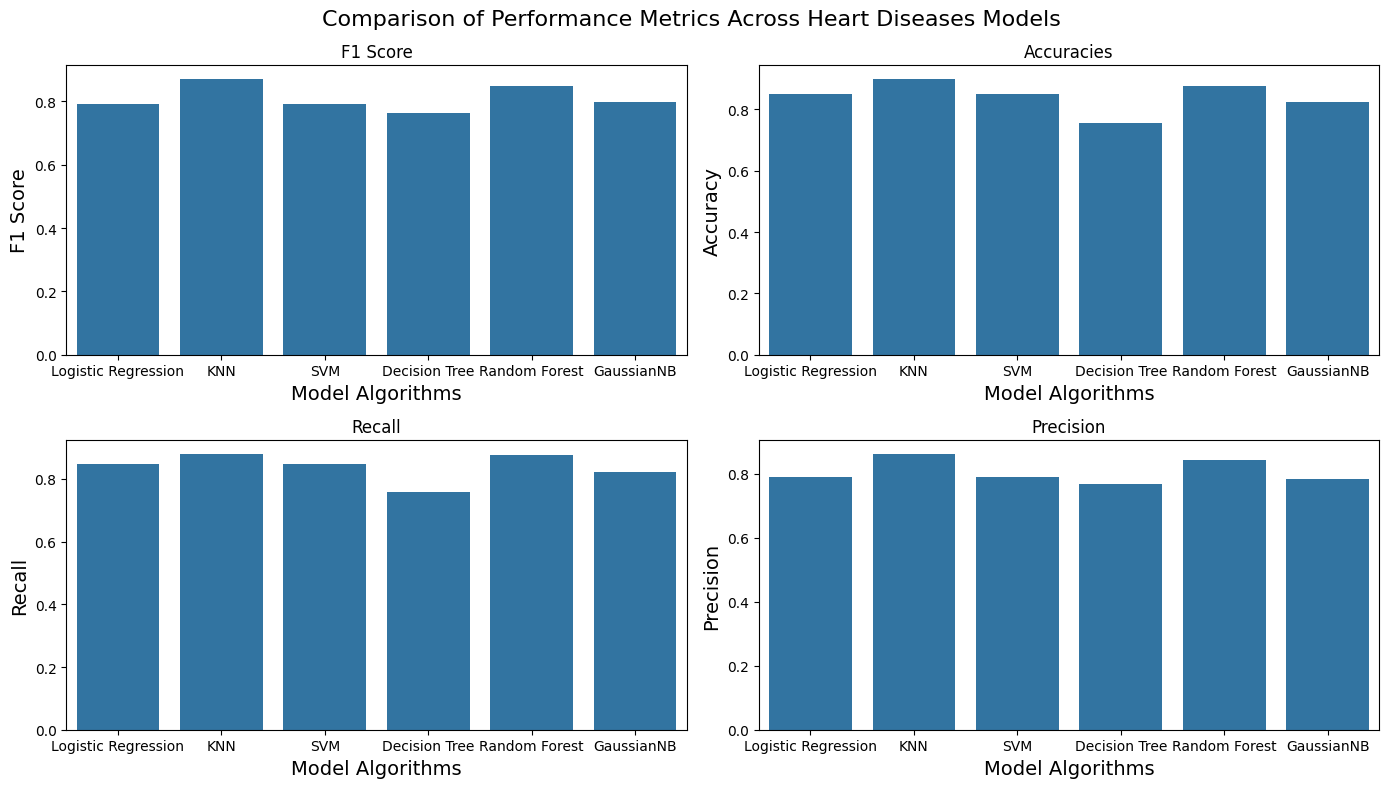

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data
data = {
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'GaussianNB'],
    'F1_Score':  [f11, f12, f13, f14, f15, f16],
    'Accuracies': [acc1, acc2, acc3, acc4, acc5, acc6],
    'Recall': [recall1, recall2, recall3, recall4, recall5, recall6],
    'Precision': [precision1, precision2, precision3, precision4, precision5, precision6]
}

df = pd.DataFrame(data)

# Setting up the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# Plot 1 - F1 Score
sns.barplot(x='Model', y='F1_Score', data=df, ax=axs[0, 0])
axs[0, 0].set_title('F1 Score')
axs[0, 0].set_xlabel('Model Algorithms', fontsize=14)
axs[0, 0].set_ylabel('F1 Score', fontsize=14)

# Plot 2 - Accuracies
sns.barplot(x='Model', y='Accuracies', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Accuracies')
axs[0, 1].set_xlabel('Model Algorithms', fontsize=14)
axs[0, 1].set_ylabel('Accuracy', fontsize=14)

# Plot 3 - Recall
sns.barplot(x='Model', y='Recall', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Model Algorithms', fontsize=14)
axs[1, 0].set_ylabel('Recall', fontsize=14)

# Plot 4 - Precision
sns.barplot(x='Model', y='Precision', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Precision')
axs[1, 1].set_xlabel('Model Algorithms', fontsize=14)
axs[1, 1].set_ylabel('Precision', fontsize=14)

# Adjust layout and show plot
plt.suptitle('Comparison of Performance Metrics Across Heart Diseases Models ', fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
import pickle

In [ ]:
filename = 'heartDiseases_model.sav'
pickle.dump(knn, open(filename, "wb"))

In [ ]:
loaded_model = pickle.load(open('heartDiseases_model.sav',"rb"))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
elif (prediction[0] == 01):
else:
  print('The person is diabetic')

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-102-5fefe605ba8d>, line 14)

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
import json
import requests


url = 'https://ee6b-34-29-235-80.ngrok.io/diabetes_prediction'


input_data_for_model = {

    'Pregnancies' : 6,
    'Glucose' : 148,
    'BloodPressure' : 72,
    'SkinThickness' : 35,
    'Insulin' : 0,
    'BMI' : 33.6,
    'DiabetesPedigreeFunction' : 0.627,
    'Age' : 50

    }

input_json = json.dumps(input_data_for_model)

response = requests.post(url, data=input_json)

print(response.text)

In [ ]:
import json
import requests


url = 'https://d0ed-34-106-246-174.ngrok.io/heartDiseases'


input_data_for_model = {
    'Age' : 10,
    'Total_cholesterol': 50,
    'SysBP': 100,
    'DiaBP': 230,
    'BMI': 20,
    'HeartRate': 3,
    'Glucose': 210,
    'Cigrate_per_day': 12



    }

input_json = json.dumps(input_data_for_model)

response = requests.post(url, data=input_json)

print(response.text)
